# Titanic Survival
## Family vs. Wealth

In this project, I'll be looking at what would have improved your chances of survival on the Titanic. Specifically, I'll be looking at whether it would have been more beneficial to have family on board, or to have money in the bank.

My reason for looking at the data from this perspective, is that I find a case for both before looking into the data: Being wealthy might have improved your chances of being helped by the crew, but having family on board might have made you part of a group with a strong desire to survive for one another. But these are just musings without looking at the data!

First, we'll import a few libraries that will make our lives easier.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-muted')
# 
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


Then we'll go ahead and import the data.

In [3]:
titanic_data = pd.read_csv('titanic-data.csv')

Now that we have the data imported, let's take a look at the first few rows to see whether we have the data that we need to answer the questions.

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great! It looks like we've got enough information to answer our question.

As we can see, there are 12 columns:

###### PassengerId
This is a unique identifier for each passenger.

###### Survived
This is a boolean with a value of 1 for "survived" and a 0 for "did not survive".

###### Pclass
This is a number from 1 to three, indicating whether the passenger was in first, second, or third class. We're interested in this as a determining factor in the wealth of the passenger.

###### Name
This is the full name of the passenger

###### Sex
If this isn't obvious, please speak to your parents

###### Age
The age of the passenger in years. If the age was lower than 1 year, it is represented as a fraction. If the age was a guess, it is followed by a .5

###### SibSp
This refers to the number of siblings or spouses on board. The data defines these relations as follows: Siblings are brother, sister, stepbrother, or stepsister. Spouses are husband or wife, with mistresses and fiancés excluded. This entry is particularly interesting from a family perspective.

###### Parch
This refers to the number of parents or children onboard with the dataset defining these relations as follows: Parents are mothers or fathers. Children are daughters, sons, stepdaughters, or stepsons. There are children with no parents listed, this is because they were travelling with a nanny. I'm a bit dissapointed that all of this information is bundled together, particularly for the comparison that we're hoping to make.

Before we go on, let's get an overall look at the data

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It's time to start looking at the data. To start with, let's create a few simple pie charts to get a high-level view of where we're going. Before we start, we'll create a helper function to speed things up for the next few pie charts, while also making our code more maintainable.

In [6]:
def plot_survival_pie(survived,deceased, label='Survival'):
    survival_series = pd.Series([survived, deceased],index=['Survived', 'Deceased'])
    survival_series.plot.pie(label=label, figsize=(5,5), colormap='coolwarm')
    
def plot_survival_pie_by_len(survived,deceased, label='Survival'):
    survival_series = pd.Series([len(survived), len(deceased)],index=['Survived', 'Deceased'])
    survival_series.plot.pie(label=label, figsize=(5,5), colormap='coolwarm')

In [7]:
survived = titanic_data[titanic_data.Survived == 1]
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [8]:
not_survived = titanic_data[titanic_data.Survived == 0]
not_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


# Survival Rates

## Total Survival

Our first pie chart shows the number of passengers who survived, vs those who didn't.

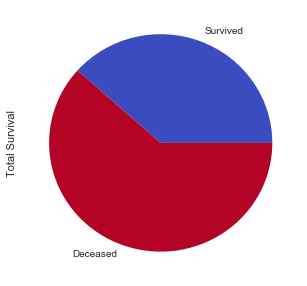

In [9]:
plot_survival_pie_by_len(survived,not_survived, 'Total Survival')

## Survival by Passenger Class

### Survival in First Class

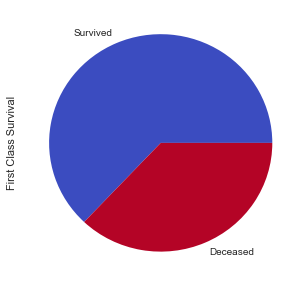

In [10]:
first_class_survived = survived[survived.Pclass == 1]
first_class_deceased = not_survived[not_survived.Pclass == 1]

plot_survival_pie_by_len(first_class_survived, first_class_deceased, 'First Class Survival')


### Survival in Second Class

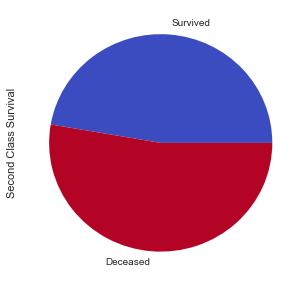

In [11]:
second_class_survived = survived[survived.Pclass == 2]
second_class_deceased = not_survived[not_survived.Pclass == 2]

plot_survival_pie_by_len(second_class_survived, second_class_deceased, 'Second Class Survival')

### Survival in Third Class

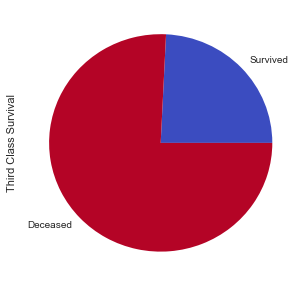

In [12]:
third_class_survived = survived[survived.Pclass == 3]
third_class_deceased = not_survived[not_survived.Pclass == 3]

plot_survival_pie_by_len(third_class_survived, third_class_deceased, 'Third Class Survival')

## Survival By Family Status

In [13]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

has_family = has_parch | has_sibsp

titanic_data['has_family'] = has_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [14]:
survived = titanic_data[titanic_data.Survived == 1]
not_survived = titanic_data[titanic_data.Survived == 0]

### Survival of those with family

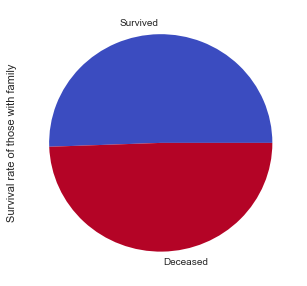

In [15]:
has_family_survived = survived[survived.has_family]
has_family_not_survived = not_survived[not_survived.has_family]

plot_survival_pie_by_len(has_family_survived,has_family_not_survived,'Survival rate of those with family')

### Survival of those without family

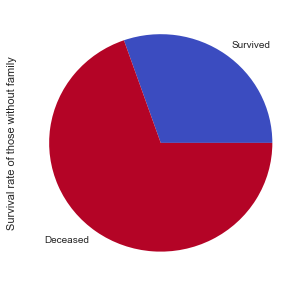

In [16]:
no_family_survived = survived[survived.has_family == False]
no_family_deceased = not_survived[not_survived.has_family == False]

plot_survival_pie_by_len(no_family_survived,no_family_deceased,'Survival rate of those without family')

In [17]:
mean_survived = titanic_data.mean()['Survived']
std_survived = titanic_data.std()['Survived']

print mean_survived
print std_survived

0.383838383838
0.486592454265


In [18]:
def standardize_mean(mean):
    return (mean - mean_survived) / std_survived

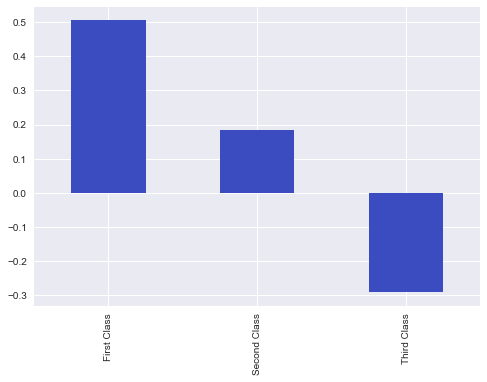

In [19]:
first_class = titanic_data[titanic_data.Pclass == 1]
second_class = titanic_data[titanic_data.Pclass == 2]
third_class = titanic_data[titanic_data.Pclass == 3]

first_class_survived = standardize_mean(first_class.mean()['Survived'])
second_class_survived = standardize_mean(second_class.mean()['Survived'])
third_class_survived = standardize_mean(third_class.mean()['Survived'])

classes = pd.Series([first_class_survived, second_class_survived,third_class_survived],
                    index=['First Class', 'Second Class', 'Third Class'])

classes.plot.bar(colormap='coolwarm')

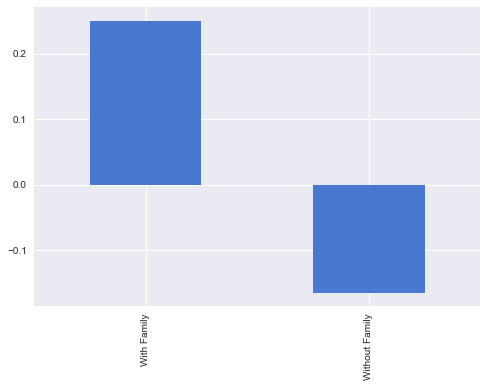

In [20]:
with_family = titanic_data[titanic_data.has_family]
without_family = titanic_data[titanic_data.has_family == False]

with_family_survived = standardize_mean(with_family.mean()['Survived'])
without_family_survived = standardize_mean(without_family.mean()['Survived'])

families = pd.Series([with_family_survived, without_family_survived],
                    index=['With Family', 'Without Family'])

families.plot.bar()

In [21]:
grouped = titanic_data.groupby('Survived').mean()
print grouped['Fare']

print grouped['has_family']

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64
Survived
0    0.318761
1    0.523392
Name: has_family, dtype: float64


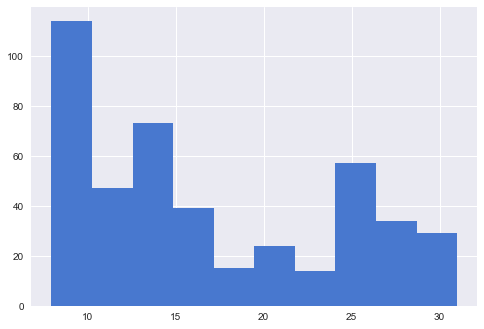

In [105]:
#titanic_data.boxplot(column="Fare")
titanic_fare_25 = titanic_data["Fare"].quantile(0.25)
titanic_fare_75 = titanic_data["Fare"].quantile(0.75)
titanic_fare_no_outliers = titanic_data[titanic_data.Fare >= titanic_fare_25]
titanic_fare_no_outliers = titanic_fare_no_outliers[titanic_fare_no_outliers.Fare <= titanic_fare_75]
titanic_fare_no_outliers['Fare'].hist(bins=10)

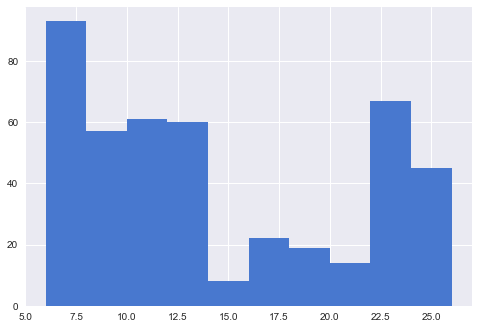

In [51]:
fare_num_bins = 20
fare_bin_size = (titanic_fare_75 - titanic_fare_25) / fare_num_bins

def reduce_fares(fare):
    return int(fare/fare_bin_size)

titanic_fare_binned = titanic_fare_no_outliers.copy()
titanic_fare_binned['Fare'] = titanic_fare_binned['Fare'].apply(reduce_fares)

titanic_fare_binned['Fare'].hist()


Fare
6    -0.324773
7    -0.523654
8    -0.299518
9     0.010379
10    0.752502
11    0.008049
12   -0.360682
13    0.124552
14    1.266279
15   -0.446311
16    1.079451
17   -0.041517
18   -0.415173
19    1.009390
20   -0.201656
22    0.286150
23    0.238725
24   -0.426163
25    0.238725
26    0.409984
Name: Survived, dtype: float64


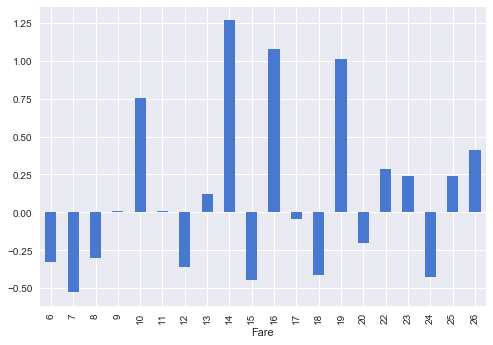

In [97]:
titanic_fare_binned_grouped = titanic_fare_binned.groupby('Fare')
titanic_fare_binned_standardized = titanic_fare_binned_grouped['Survived'].mean().apply(standardize_mean)
print titanic_fare_binned_standardized
titanic_fare_binned_standardized.plot.bar()

Correlation: 
0.198864450122


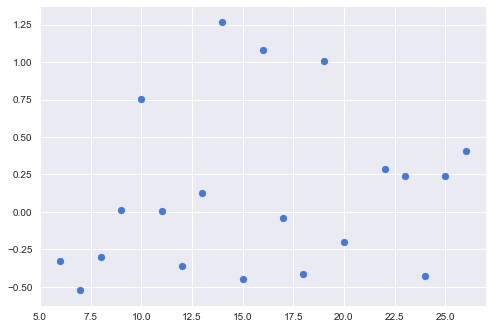

In [106]:
fare_correlation = pd.DataFrame({'fare': titanic_fare_binned_standardized.index.values,
                                  'survived': titanic_fare_binned_standardized.values})

print 'Correlation: '
print fare_correlation.corr(method='pearson').loc['fare','survived']

plt.scatter(titanic_fare_binned_standardized.index.values, titanic_fare_binned_standardized.values)

## Family Data by Number of Family

In [60]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

num_family = parch_col + sibsp_col

titanic_data['num_family'] = num_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family,num_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0


In [70]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,num_family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


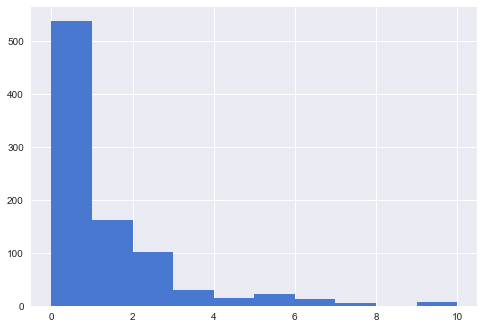

In [61]:
titanic_data['num_family'].hist()

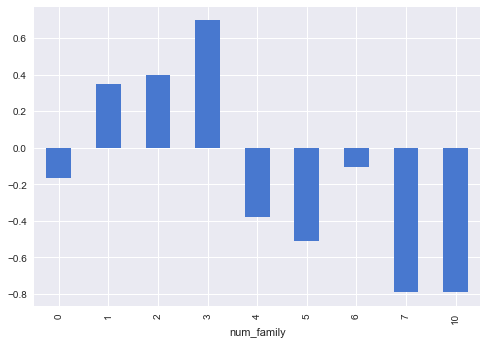

In [107]:
titanic_family = titanic_data.groupby('num_family')
titanic_family_std = titanic_family['Survived'].mean().apply(standardize_mean)
titanic_family_std.plot.bar()

Correlation: 
-0.700326626315


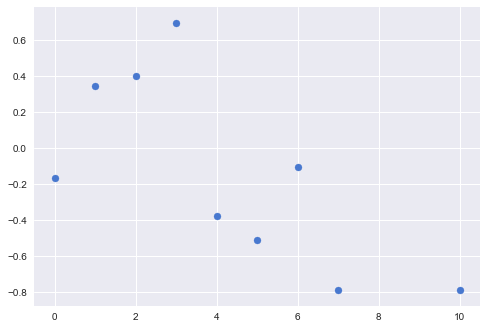

In [108]:
family_correlation = pd.DataFrame({'num_family': titanic_family_std.index.values,
                                  'survived': titanic_family_std.values})

print 'Correlation: '
print family_correlation.corr(method='pearson').loc['num_family', 'survived']

plt.scatter(titanic_family_std.index.values, titanic_family_std.values)

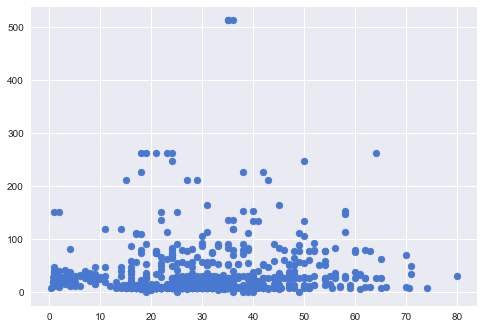

In [59]:
age_and_fare = titanic_data.groupby(['Survived', 'Fare'], as_index=False)
age = titanic_data['Age'].values
fare = titanic_data['Fare'].values
plt.scatter(age, fare)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

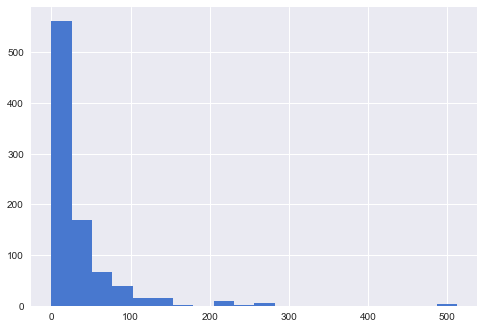

In [45]:
titanic_data['Fare'].hist(bins=20)
titanic_data['Fare'].head()

(array([ 210.,    0.,  112.,    0.,    0.,   13.,    0.,    4.,    0.,    3.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

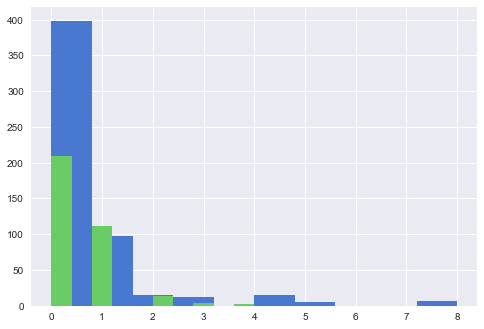

In [46]:
not_survived_by_sibsp = not_survived['SibSp']
survived_by_sibsp = survived['SibSp']

plt.hist(not_survived_by_sibsp)
plt.hist(survived_by_sibsp)

(array([ 233.,    0.,   65.,    0.,   40.,    0.,    0.,    3.,    0.,
           0.,    0.,    1.]),
 array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
         2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
         4.16666667,  4.58333333,  5.        ]),
 <a list of 12 Patch objects>)

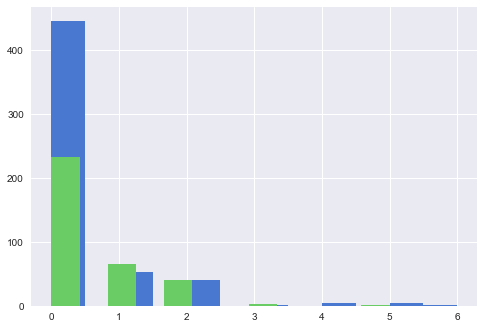

In [47]:
not_survived_by_parch = not_survived['Parch']
survived_by_parch = survived['Parch']

plt.hist(not_survived_by_parch, bins=12)
plt.hist(survived_by_parch, bins=12)

In [48]:
child_max_age = 16

children = titanic_data[titanic_data.Age <= child_max_age]

children.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000
mean,430.020000,0.55,2.610000,8.006700,1.570000,1.140000,31.588877
std,285.031842,0.50,0.649709,5.634042,1.653005,0.765678,31.882021
min,8.000000,0.00,1.000000,0.420000,0.000000,0.000000,7.225000
25%,172.750000,0.00,2.000000,3.000000,0.000000,1.000000,14.488550
50%,414.000000,1.00,3.000000,7.500000,1.000000,1.000000,26.000000
75%,723.750000,1.00,3.000000,14.000000,3.000000,2.000000,34.375000
max,876.000000,1.00,3.000000,16.000000,5.000000,3.000000,211.337500


In [49]:
elderly_min_age = 60

elderly = titanic_data[titanic_data.Age >= elderly_min_age]

elderly.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,455.807692,0.269231,1.538462,65.096154,0.230769,0.307692,43.467950
std,240.078490,0.452344,0.811456,5.110811,0.429669,0.837579,51.269998
min,34.000000,0.000000,1.000000,60.000000,0.000000,0.000000,6.237500
25%,277.250000,0.000000,1.000000,61.250000,0.000000,0.000000,10.500000
50%,489.000000,0.000000,1.000000,63.500000,0.000000,0.000000,28.275000
75%,629.750000,0.750000,2.000000,69.000000,0.000000,0.000000,58.860450
max,852.000000,1.000000,3.000000,80.000000,1.000000,4.000000,263.000000


(array([ 7.,  6.,  5.,  1.,  0.,  5.,  0.,  1.,  0.,  1.]),
 array([ 60.,  62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.]),
 <a list of 10 Patch objects>)

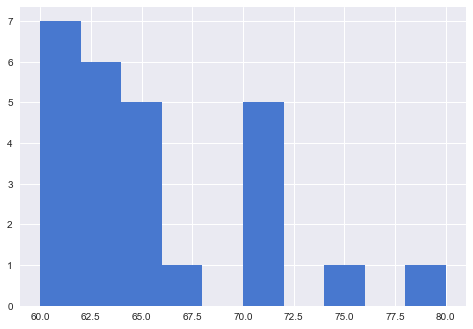

In [50]:
elderly_by_age = elderly['Age']
plt.hist(elderly_by_age)